# Linear Regression Hardcoded

In this notebook, we are going to hardcode the linear regression algorithm (no use of libraries like scikit-learn and such)

## imports + configurations

in this part we are going to import our dependencies

In [12]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

in this part we import our data.<br>
The dataset represents the changes in temperature during the world war 2.<br>
I got the data from kaggle: __[Weather World War 2](https://www.kaggle.com/smid80/weatherww2)__

In [3]:

data = pd.read_csv("datasets/weather_ww2/Summary of Weather.csv", delimiter=',', low_memory=False)
data.fillna(0,inplace=True)
data.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,0.0,25.555556,22.222222,23.888889,0,0,42,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
1,10001,1942-7-2,0,0.0,28.888889,21.666667,25.555556,0,0,42,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
2,10001,1942-7-3,2.54,0.0,26.111111,22.222222,24.444444,0,0,42,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
3,10001,1942-7-4,2.54,0.0,26.666667,22.222222,24.444444,0,0,42,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
4,10001,1942-7-5,0,0.0,26.666667,21.666667,24.444444,0,0,42,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0


In [4]:
data.describe()

,STA,WindGustSpd,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,DR,SPD,...,FT,FB,FTI,ITH,PGT,SD3,RHX,RHN,RVG,WTE
count,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,...,119040.0,119040.0,119040.0,119040.0,119040.000000,119040.0,119040.0,119040.0,119040.0,119040.0
mean,29659.435795,0.168818,27.045111,17.789511,22.411631,43.805284,6.726016,15.797530,0.120884,0.091154,...,0.0,0.0,0.0,0.0,0.053300,0.0,0.0,0.0,0.0,0.0
std,20953.209402,2.611819,8.717817,8.334572,8.297982,1.136718,3.425561,8.794541,2.069915,1.410269,...,0.0,0.0,0.0,0.0,0.886512,0.0,0.0,0.0,0.0,0.0
min,10001.000000,0.000000,-33.333333,-38.333333,-35.555556,40.000000,1.000000,1.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
25%,11801.000000,0.000000,25.555556,15.000000,20.555556,43.000000,4.000000,8.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
50%,22508.000000,0.000000,29.444444,21.111111,25.555556,44.000000,7.000000,16.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
75%,33501.000000,0.000000,31.666667,23.333333,27.222222,45.000000,10.000000,23.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
max,82506.000000,75.932000,50.000000,34.444444,40.000000,45.000000,12.000000,31.000000,78.000000,41.000000,...,0.0,0.0,0.0,0.0,23.900000,0.0,0.0,0.0,0.0,0.0


Now we select the rows we are going to use.

In [11]:
columns = ['STA','MaxTemp','MinTemp','MeanTemp']
filteredColumns = data[columns]
filteredColumns.describe()

,STA,MaxTemp,MinTemp,MeanTemp
count,119040.000000,119040.000000,119040.000000,119040.000000
mean,29659.435795,27.045111,17.789511,22.411631
std,20953.209402,8.717817,8.334572,8.297982
min,10001.000000,-33.333333,-38.333333,-35.555556
25%,11801.000000,25.555556,15.000000,20.555556
50%,22508.000000,29.444444,21.111111,25.555556
75%,33501.000000,31.666667,23.333333,27.222222
max,82506.000000,50.000000,34.444444,40.000000


And we print a nice graph representing the Minimum temperature / Mean(Maximum temperature).

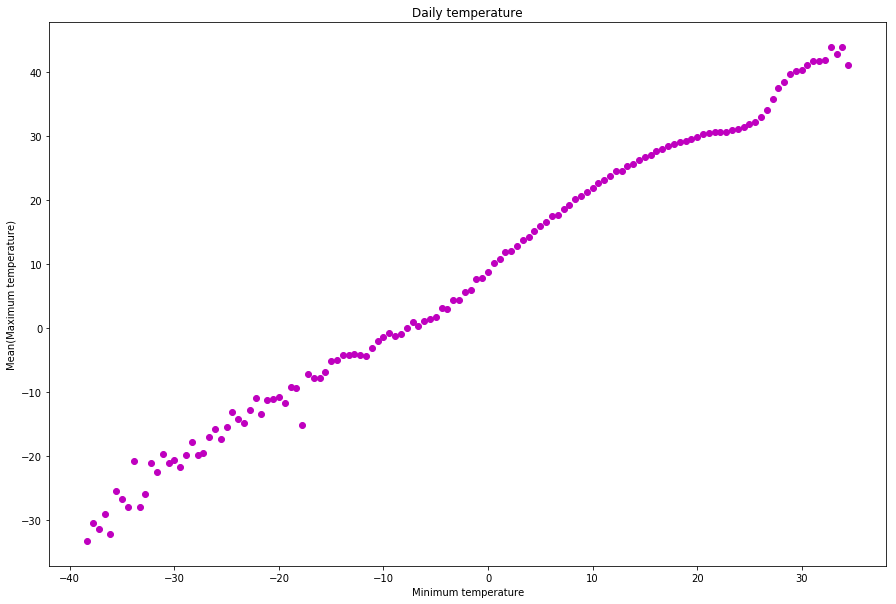

In [93]:
#select only the MinTemp and MaxTemp columns
#group the data by MinTemp (x axis)
#calculate the mean of the MaxTemp (y axis)
#reset the dataframe with the column names as indexes
dataWithYAsMean = filteredColumns[['MinTemp','MaxTemp']].groupby('MinTemp').mean().reset_index()

x = dataWithYAsMean['MinTemp']
y = dataWithYAsMean['MaxTemp']

plt.figure(figsize=(15,10))

plt.title('Correlation between Max')
plt.xlabel('Minimum temperature')
plt.ylabel('Mean(Maximum temperature)')
plt.plot(x,y,'mo')